## MLP

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import random

random.seed(1)
np.random.seed(1)
tf.random.set_seed(1)

In [2]:
# Prepare MNIST data.
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()
# Convert to float32.
x_train, x_test = tf.cast(x_train, tf.float32), tf.cast(x_test, tf.float32)

num_classes = 10
num_features = x_train.shape[1] * x_train.shape[2]

print(num_classes)
print(num_features)

# Flatten images to 1-D vector of 784 features (28*28).
x_train, x_test = tf.reshape(x_train,[-1, num_features]), tf.reshape(x_test, [-1, num_features])
# Normalize images value from [0, 255] to [0, 1].

x_train, x_test = x_train / 255., x_test / 255.

10
784


In [3]:
# tensorflow.keras.Model 혹은 tensorflow.keras.layers를 사용해서 간단하게
from tensorflow.keras import Model, layers

class NeuralNet(Model):
    def __init__(self):
        super(NeuralNet, self).__init__()
        self.fc1 = layers.Dense(128, activation=tf.nn.relu)
        self.fc2 = layers.Dense(256, activation=tf.nn.relu)
        self.out = layers.Dense(num_classes)

    def call(self, x, is_training=False):
        x = self.fc1(x)
        x = self.fc2(x)
        x = self.out(x)
        if not is_training:
            x = tf.nn.softmax(x)
        return x

neural_net = NeuralNet()

In [4]:
def cross_entropy_loss(x, y): # with_logits --> logits를 쓰는게 numerical stable하다
    y = tf.cast(y, tf.int64)
    loss = tf.nn.sparse_softmax_cross_entropy_with_logits(labels=y, logits=x)
    return tf.reduce_mean(loss)

# Accuracy metric.
def accuracy(y_pred, y_true):
    correct_prediction = tf.equal(tf.argmax(y_pred, 1), tf.cast(y_true, tf.int64))
    return tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

In [5]:
lr = 0.003
optimizer = tf.optimizers.SGD(lr)

def run_optimization(x, y):
    with tf.GradientTape() as g:
        pred = neural_net(x, is_training=True)
        loss = cross_entropy_loss(pred, y)

    trainable_variables = neural_net.trainable_variables
    gradients = g.gradient(loss, trainable_variables)
    optimizer.apply_gradients(zip(gradients, trainable_variables))

In [6]:
# Use tf.data API to shuffle and batch data.
batch_size = 200
train_data = tf.data.Dataset.from_tensor_slices((x_train, y_train))
train_data = train_data.shuffle(60000).batch(batch_size).prefetch(1)

epoch = 40
display_epoch = 4

# Run training for the given number of steps.
for epo in range(1,epoch+1):
    for step, (batch_x, batch_y) in enumerate(train_data, 1):
        run_optimization(batch_x, batch_y)

    if epo % display_epoch == 0:
        pred = neural_net(batch_x)
        loss = cross_entropy_loss(pred, batch_y)
        acc = accuracy(pred, batch_y)
        print("epoch: ", epo, ", loss: ", loss.numpy(), ", acc: ", acc.numpy())

epoch:  4 , loss:  1.8856586 , acc:  0.825
epoch:  8 , loss:  1.7182207 , acc:  0.875
epoch:  12 , loss:  1.6614052 , acc:  0.885
epoch:  16 , loss:  1.6558837 , acc:  0.88
epoch:  20 , loss:  1.596233 , acc:  0.925
epoch:  24 , loss:  1.613273 , acc:  0.9
epoch:  28 , loss:  1.5950165 , acc:  0.935
epoch:  32 , loss:  1.584018 , acc:  0.93
epoch:  36 , loss:  1.5845684 , acc:  0.92
epoch:  40 , loss:  1.5770797 , acc:  0.935


In [7]:
# Test model on validation set.
pred = neural_net(x_test)
print("Test Accuracy: ", accuracy(pred, y_test).numpy())

Test Accuracy:  0.926


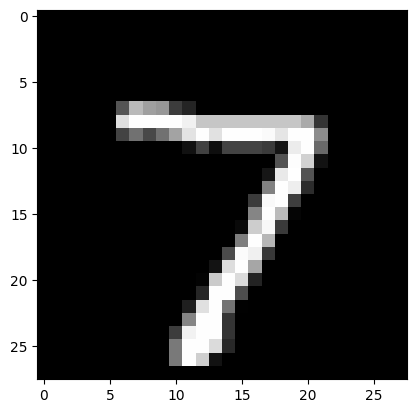

Model prediction: 7


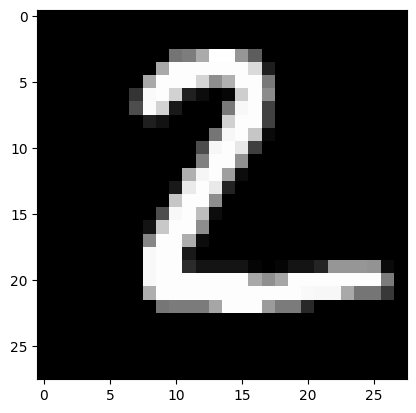

Model prediction: 2


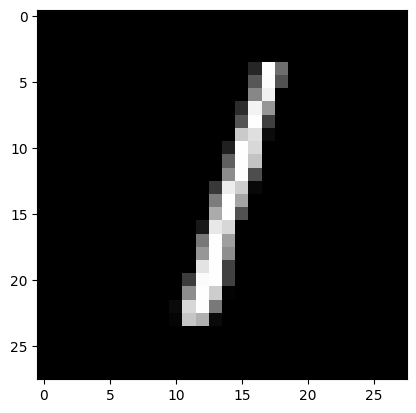

Model prediction: 1


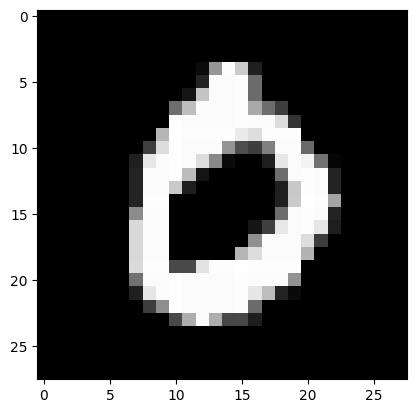

Model prediction: 0


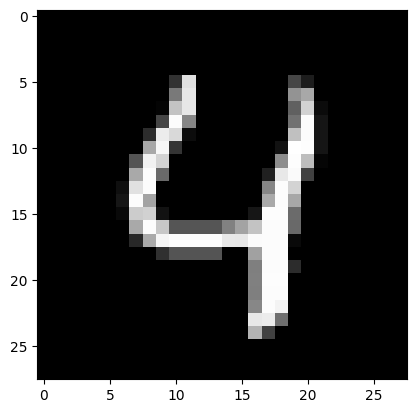

Model prediction: 4


In [8]:
# Predict 5 images from validation set.
n_images = 5
test_images = x_test[:n_images]
predictions = neural_net(test_images)

# Display image and model prediction.
for i in range(n_images):
    plt.imshow(np.reshape(test_images[i], [28, 28]), cmap='gray')
    plt.show()
    print("Model prediction: %i" % np.argmax(predictions.numpy()[i]))

## model.fit방식으로 구현

In [9]:
model2=tf.keras.Sequential([
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(10)
])

In [10]:
model2.compile(
    optimizer='SGD',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=['accuracy']
) # 어떤 loss func을 사용하고, metric, optimizer를 사용할지 결정

Epoch 1/40
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.5010 - loss: 1.7803
Epoch 2/40
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8627 - loss: 0.5602
Epoch 3/40
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8892 - loss: 0.4039
Epoch 4/40
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9019 - loss: 0.3496
Epoch 5/40
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9095 - loss: 0.3193
Epoch 6/40
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9160 - loss: 0.2982
Epoch 7/40
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9198 - loss: 0.2816
Epoch 8/40
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9235 - loss: 0.2678
Epoch 9/40
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9271 - loss: 0.2558
Epoch 10/40
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9305 - loss: 0.2449
Epoch 11/40
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9336 - loss: 0.2350
Epoch 12/40
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step

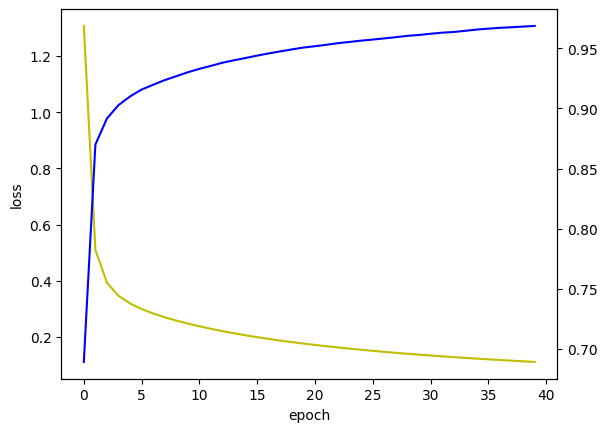

In [11]:
inform = model2.fit(x_train, y_train, batch_size=128, epochs=40)

fig, loss_ax = plt.subplots()
acc_ax = loss_ax.twinx()

loss_ax.plot(inform.history['loss'], 'y', label='train loss')
loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')
acc_ax.plot(inform.history['accuracy'], 'b', label='train acc')

plt.show()

In [12]:
test_loss, test_acc = model2.evaluate(x_test, y_test) # verbose = 0 --> ignore, 1 --> progress bare, 2--> one line per epoch

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9604 - loss: 0.1362
